# Goals

Find the best strategies to improve for the next marketing campaign. 
*How can the financial institution have a greater effectiveness for future marketing campaigns?* In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

# Data Quality Check
- Q1: Does any data have any features that don't fit?
- Q2: Does the data contain any duplicates, missing values, or outliers? How do you fix it?
- Q3: Are the data distributed in an unreasonable manner?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.color_palette("Spectral", as_cmap=True)

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

# Question 1
Does any data have any features that don't fit?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
for dtype, col in(list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
        print()
    else :
        print(col, dtype)
        print(df[col].unique())
        print()

age int64
18 95

job object
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital object
['married' 'single' 'divorced']

education object
['secondary' 'tertiary' 'primary' 'unknown']

default object
['no' 'yes']

balance int64
-6847 81204

housing object
['yes' 'no']

loan object
['no' 'yes']

contact object
['unknown' 'cellular' 'telephone']

day int64
1 31

month object
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration int64
2 3881

campaign int64
1 63

pdays int64
-1 854

previous int64
0 58

poutcome object
['unknown' 'other' 'failure' 'success']

deposit object
['yes' 'no']



# Question 2
Does the data contain any duplicates, missing values, or outliers? How do you fix it?

## Duplicate

In [6]:
df.duplicated().sum()

0

## Missing value

In [7]:
df.isna().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64

In [8]:
# # Drop missing values
# df = df.dropna()
# df.isnull().sum()

So we see that there are no missing values.

## Outliers

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

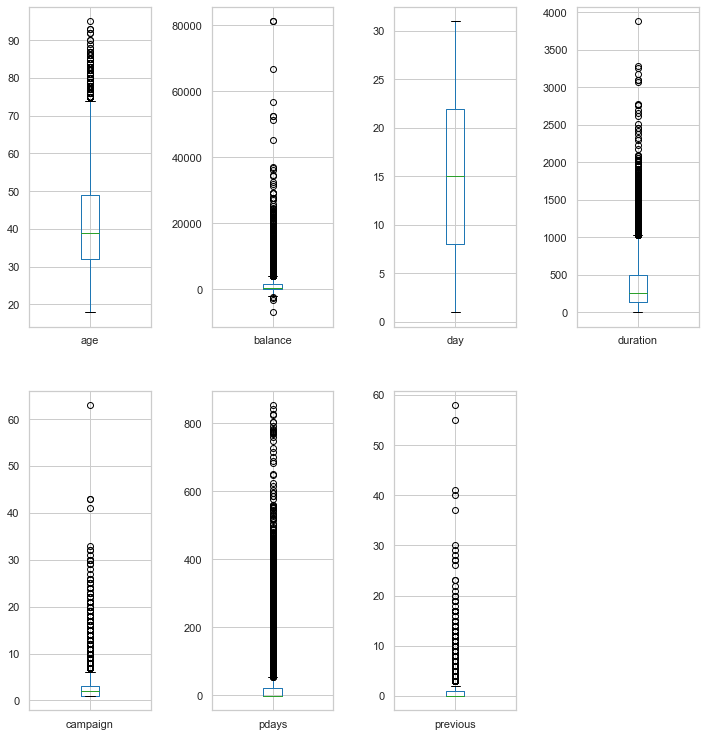

In [11]:
num_columns=df.select_dtypes(include=['int64'])
num_columns.plot(subplots=True, layout=(3,4), kind='box', figsize=(12,20))
plt.subplots_adjust(wspace=0.5)

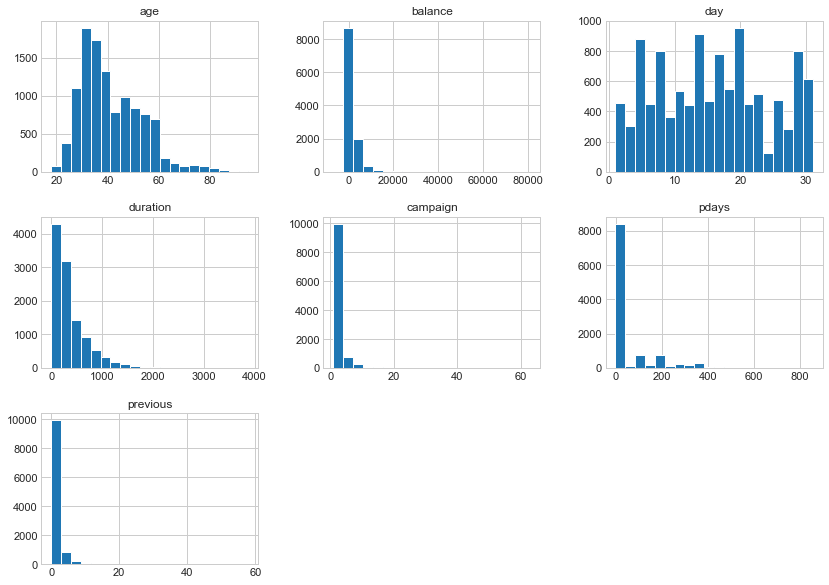

In [12]:
numeric=num_columns.columns

plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), column=numeric)
plt.show()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.
Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:

In [13]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


Percentage of `pdays` values above 400:

In [14]:
# len (df[df['pdays'] > 400] ) / len(df) * 100

`pdays` holds the number of days that passed by after the client was last contacted from a previous campaign. Looking closer into `pdays` data we can see that:

- only 1.2% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
- -1 possibly means that the client wasn't contacted before or stands for missing data.
Since we are not sure exactly what -1 means I suggest to drop this column, because -1 makes more than 50% of the values of the column.

## Question 3
Are the data distributed in an unreasonable manner?

### Categorical columns distribution

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


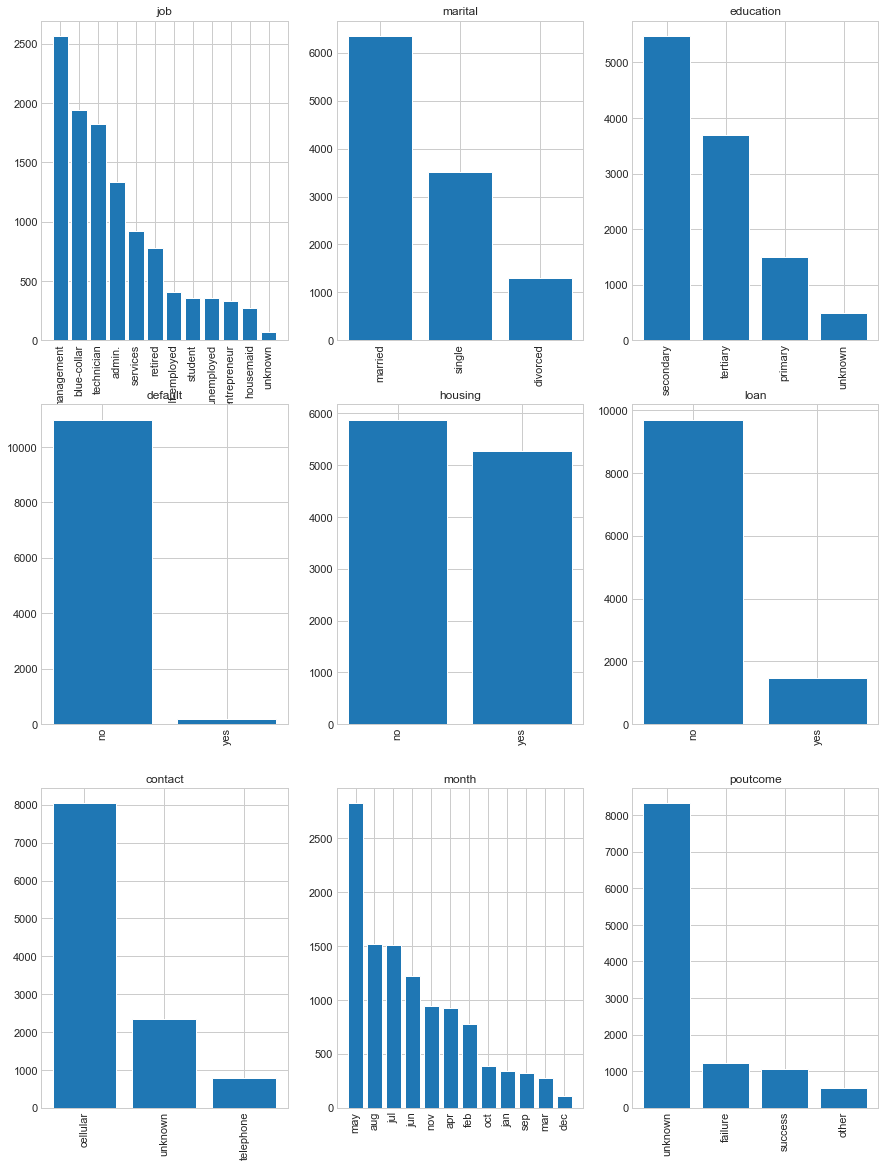

In [16]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(15, 20))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

there is no odd distribution in the categorical data column

# Data Insight

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Analysis of the response
Target column = `deposit`

no     5873
yes    5289
Name: deposit, dtype: int64

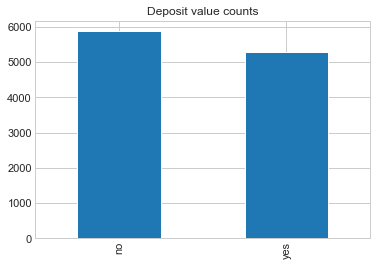

In [18]:
count_deposit = df['deposit'].value_counts()

count_deposit.plot.bar(title = 'Deposit value counts')
count_deposit

In [19]:
def barPerc(df, xVar,ax):
    '''
    barPerc(): Add percentage for hue to bar plots
    args:
        df:pandas dataframe
        xVar: (string) X variable
        ax: Axess object (for Seaborn Countplot/Bar plot or pandas bar plot)
    '''
    #1. how many categories
    ## check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])
    
    #2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. for each x variable
    for ind in range(numX):
        ##2b. Get every hue bar
        ##    ex. 8 X categories, 4 hues=>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for pecentages)
        total= sum([x.get_height() for x in hueBars])
        
        #3. Print the percentage on bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,bar.get_height(), 
                    f'{bar.get_height()/total:.0%}', ha='center', va='bottom')

## Category column

### Marital status

,yes,no
married,2755,3596
single,1912,1606
divorced,622,671


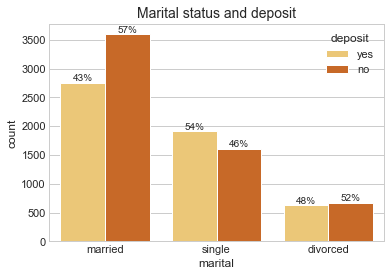

In [20]:
#marital status and deposit
ax= sns.countplot(x='marital', hue='deposit', data=df, palette='YlOrBr')
ax.set_title('Marital status and deposit', fontsize = 14)
barPerc(df, 'marital', ax)

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()
j_df

dapat dilihat bahwa customer dengan status marital single cenderung berlangganan term deposito, sedangkan customer yang sudah menikah/berkeluarga cenderung tidak mengambil/menggunakan term deposito

###  House loan?

,yes,no
no,3354,2527
yes,1935,3346


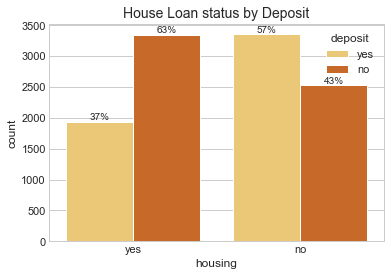

In [21]:
#Housing status and deposit
ax= sns.countplot(x='housing', hue='deposit', data=df, palette='YlOrBr')
ax.set_title('House Loan status by Deposit', fontsize = 14)
barPerc(df, 'housing', ax)

j_dh = pd.DataFrame()
j_dh['yes'] = df[df['deposit'] == 'yes']['housing'].value_counts()
j_dh['no'] = df[df['deposit'] == 'no']['housing'].value_counts()
j_dh

Customers who have house installments typically do not sign up for deposit terms, but customers who do not have home installments typically do.

###  Job

,yes,no
management,1301,1265
technician,840,983
blue-collar,708,1236
admin.,631,703
retired,516,262
services,369,554
student,269,91
unemployed,202,155
self-employed,187,218
entrepreneur,123,205


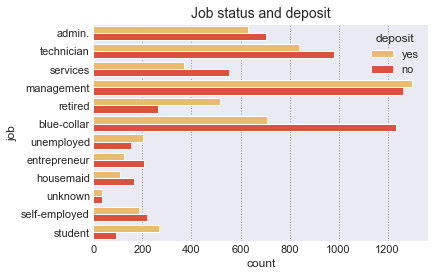

In [22]:
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
#job and deposit
ax= sns.countplot(y='job', hue='deposit', data=df, orient='', palette='YlOrRd')
ax.set_title('Job status and deposit', fontsize = 14)
plt.savefig('Job status and deposit.png')

j_df = pd.DataFrame()
j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()
j_df

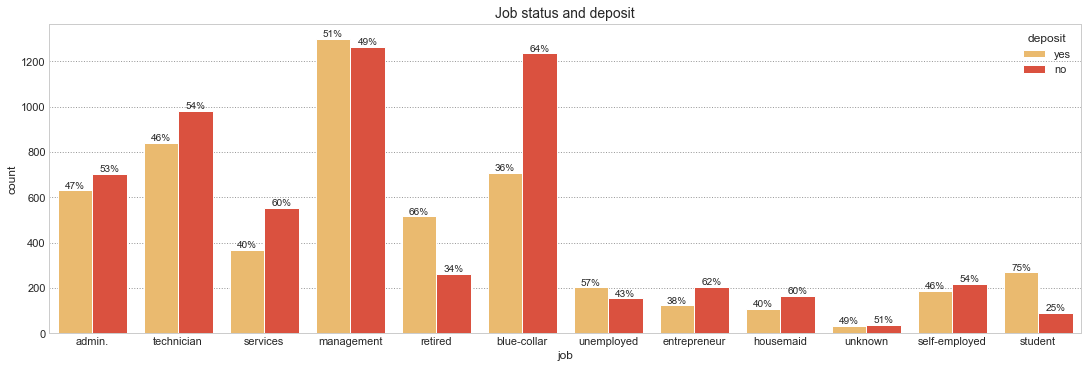

In [23]:
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fig, ax = plt.subplots(1, 1, figsize=(15,5), constrained_layout = True) 
ax= sns.countplot(x='job', hue='deposit', data=df, orient='', palette='YlOrRd')
ax.set_title('Job status and deposit', fontsize = 14)
# plt.xticks(rotation=45)
barPerc(df, 'job', ax)

In [24]:
count_job_response = pd.crosstab(df['deposit'], df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response = count_job_response.transpose()

count_job_response


deposit,no,yes
job,,
admin.,52.698651,47.301349
blue-collar,63.580247,36.419753
entrepreneur,62.500000,37.500000
housemaid,60.218978,39.781022
management,49.298519,50.701481
retired,33.676093,66.323907
self-employed,53.827160,46.172840
services,60.021668,39.978332
student,25.277778,74.722222


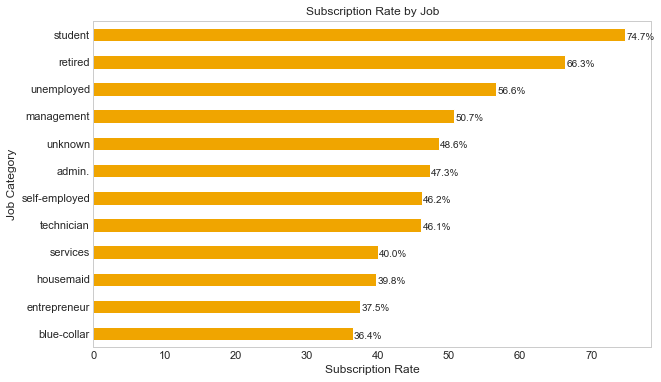

In [25]:

plot_job = count_job_response['yes'].sort_values(ascending = True).plot(kind ='barh', color = '#F0A500', figsize = (10,6))
                                                                                
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')
plt.grid(False)

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+2.2, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

customer dengan status `student` dan `retired`  cenderung berlangganan term deposito. customer yang cenderung tidak tertarik dalam menggunakan/berlangganan term deposito adalah customer yang memiliki pekerjaan sebagai blue-colar dan service.

Nanti akan dilihat lebih jauh mengenai 'age' dari group 'student' terhadap response

### Education

,yes,no
secondary,2450,3026
tertiary,1996,1693
primary,591,909
unknown,252,245


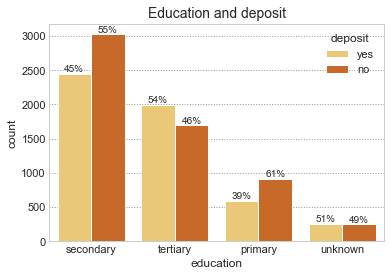

In [26]:
#education and deposit
ax= sns.countplot(x='education', hue='deposit', data=df, palette='YlOrBr')
ax.set_title('Education and deposit', fontsize = 14)
barPerc(df, 'education', ax)


j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()
j_df

customer dengan status pendidikan `primary` cenderung tidak berlangganan term deposito, sedangkan customer dengan pendidikan `tertiary` memiliki seddikit kecenderungan dalam berlangganan term deposito

### Contact

,yes,no
cellular,4369,3673
unknown,530,1816
telephone,390,384


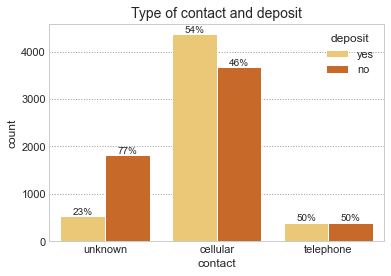

In [27]:
#type of contact and deposit
ax= sns.countplot(x='contact', hue='deposit', data=df, palette='YlOrBr')
ax.set_title('Type of contact and deposit', fontsize = 14)
barPerc(df, 'contact', ax)
plt.savefig('ype of contact and deposit.png')
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df

Customers who communicate using `cellular` have a tendency to subscribe to term deposits.

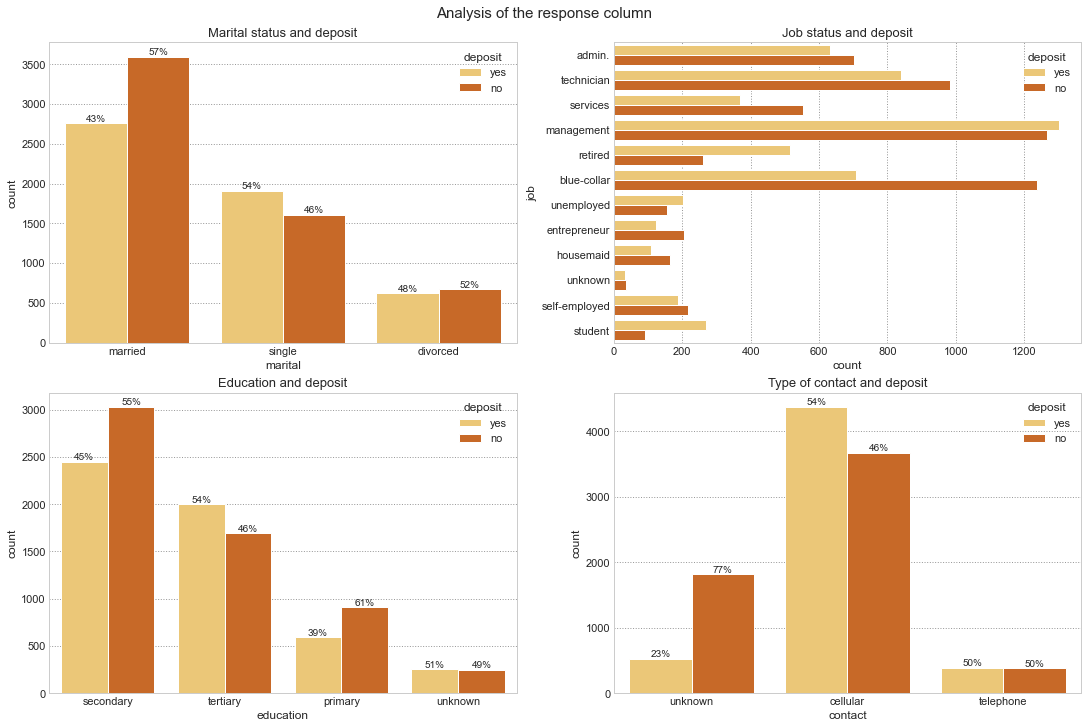

In [28]:
#define dimensions of subplots (rows, columns)
fig, ax = plt.subplots(2, 2, figsize=(15,10), constrained_layout = True)
fig.suptitle('Analysis of the response column', fontsize= 15, weight=15)
# fig.tight_layout(pad=7.0)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.0,
                    wspace=0.4,
                    hspace=0.4)

#create chart in each subplot
##marital status and deposit
sns.countplot(x='marital', hue='deposit', data=df, palette='YlOrBr', ax=ax[0,0])
ax[0,0].set_title('Marital status and deposit', fontsize = 13)
barPerc(df, 'marital', ax[0,0])

##job and deposit
sns.countplot(y='job', hue='deposit', data=df, orient='', palette='YlOrBr', ax=ax[0,1])
ax[0,1].set_title('Job status and deposit', fontsize = 13)

## education and deposit
sns.countplot(x='education', hue='deposit', data=df, palette='YlOrBr',  ax=ax[1,0])
ax[1,0].set_title('Education and deposit', fontsize = 13)
barPerc(df, 'education', ax[1,0])

#type of contact and deposit
sns.countplot(x='contact', hue='deposit', data=df, palette='YlOrBr',  ax=ax[1,1])
ax[1,1].set_title('Type of contact and deposit', fontsize = 13)
barPerc(df, 'contact', ax[1,1])

### Summary

#### Insight 1:
Regarding the diagrams we can tell that according to our dataset:

**less likely response**
- Customers with `blue-collar` and `services` occupation are less likely to subscribe for term deposit. 
- `Married` customers are less likely to subscribe for term deposit. 
- Customers with `cellular` type of contact are less likely to subscribe for term deposit. 
- Customers who have `house installment` typically do not sign up for deposit terms.

**likely response**
- Customers with `student` and `retired` status tend to subscribe to term deposits.
- Customers with `terutary` education have little possibility to subscribe term deposits.
- Customers who **don't** have `home installments` tend to subscribe to term deposits.

*`Latter, we will see about correlation between age of student and retired (jobs) who tend to subscribe to term deposits`*

Now let's look how numerical columns affect term deposit subscription.










## Numerical Column

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### balance

Balance of the individual.

In [31]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


<AxesSubplot: title={'center': 'Balance and deposit statistics'}>

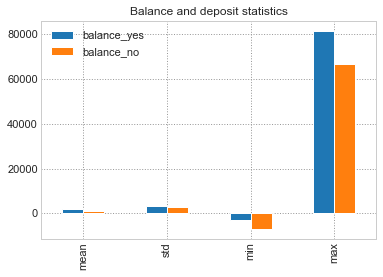

In [32]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

### age

In [33]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<AxesSubplot: title={'center': 'Age and deposit statistics'}>

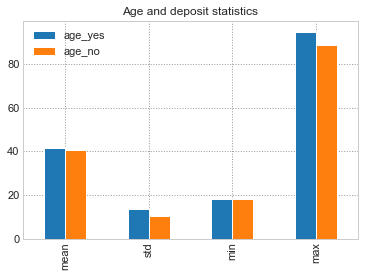

In [34]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

### duration 

 last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [35]:
d_df = pd.DataFrame()
d_df['duration_yes'] = (df[df['deposit'] == 'yes'][['deposit','duration']].describe())['duration']
d_df['duration_no'] = (df[df['deposit'] == 'no'][['deposit','duration']].describe())['duration']

d_df

,duration_yes,duration_no
count,5289.000000,5873.000000
mean,537.294574,223.130257
std,392.525262,208.577530
min,8.000000,2.000000
25%,244.000000,94.000000
50%,426.000000,163.000000
75%,725.000000,282.000000
max,3881.000000,3284.000000


<AxesSubplot: title={'center': 'Duration and deposit statistics'}>

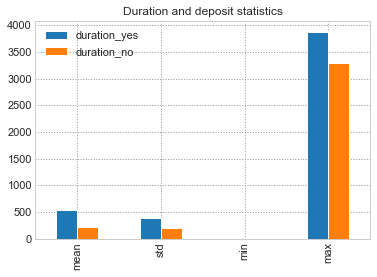

In [36]:
d_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Duration and deposit statistics')

### campaign

number of contacts performed during this campaign ('campaign') and deposit

In [37]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot: title={'center': 'Campaign and deposit statistics'}>

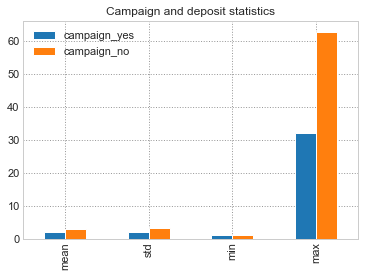

In [38]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Campaign and deposit statistics')

### pdays

Number of days that passed by after the client was last contacted from a previous campaign  (numeric; 999 means client was not previously contacted)

In [39]:
pd_df = pd.DataFrame()
pd_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','pdays']].describe())['pdays']
pd_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','pdays']].describe())['pdays']

pd_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,68.702968,35.685340
std,118.822266,96.182893
min,-1.000000,-1.000000
25%,-1.000000,-1.000000
50%,-1.000000,-1.000000
75%,98.000000,-1.000000
max,854.000000,826.000000


<AxesSubplot: title={'center': 'Pdays and deposit statistics'}>

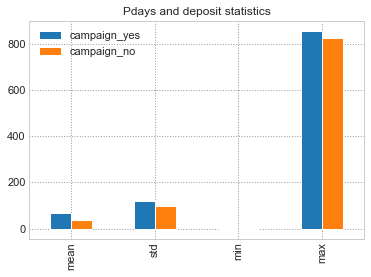

In [40]:
pd_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Pdays and deposit statistics')

### previous

number of contacts performed during previous campaign ('previous') and deposit

In [41]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


<AxesSubplot: title={'center': 'Previous and deposit statistics'}>

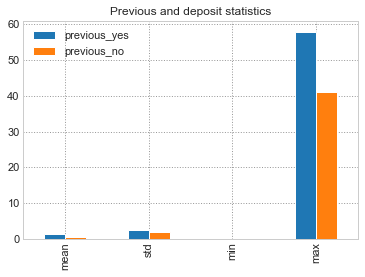

In [42]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Previous and deposit statistics')

### Summary

#### Insight 2:
- Customers who tend to subscribe to term deposits tend to have a high value of balance and age.
- People who subscribed for term deposits tend to have fewer contacts during this campaign.

<!-- The top Five most important features :
1. **Duration** (how long it took the conversation between the sales representative and the potential client)
2. **Month** (the month of the year)
3. **Housing**
4. **Loan**
5. **Default** (customer credit)

<!-- The top three most important features for our classifier are **Duration (how long it took the conversation between the sales representative and the potential client), contact (number of contacts to the potential client within the same marketing campaign), month (the month of the year).
1. **Poutcome_success* :
2. **Duration** : Durasi panggilan terakhir yang cutomer dapatkan
3. **month** : Bulan terakhir customer dihubungi, dimana diagram diatas cenderung menunjukan semakin lama jarak customer dihubungi dari jadwal campaign, semain besar kemungkinan customer akan menggunakan term deposito, data diatas juga menyebutkan bulan terbaik adalah bulan maret
4. customer's loan
5. selanjutnya customer dengan tipe pekerjaan **blue-colar**
6. Education **teritory**
7. Contact telephone
8. Age
9. Balance --> -->

## Analysis by Occupation:

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [44]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [45]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
df['job']=df['job'].apply(lambda x: 'management' if str(x) in ['admin.'] else str(x))

In [46]:
df['job'].unique()

array(['management', 'technician', 'services', 'retired', 'blue-collar',
       'unemployed', 'entrepreneur', 'housemaid', 'self-employed',
       'student'], dtype=object)

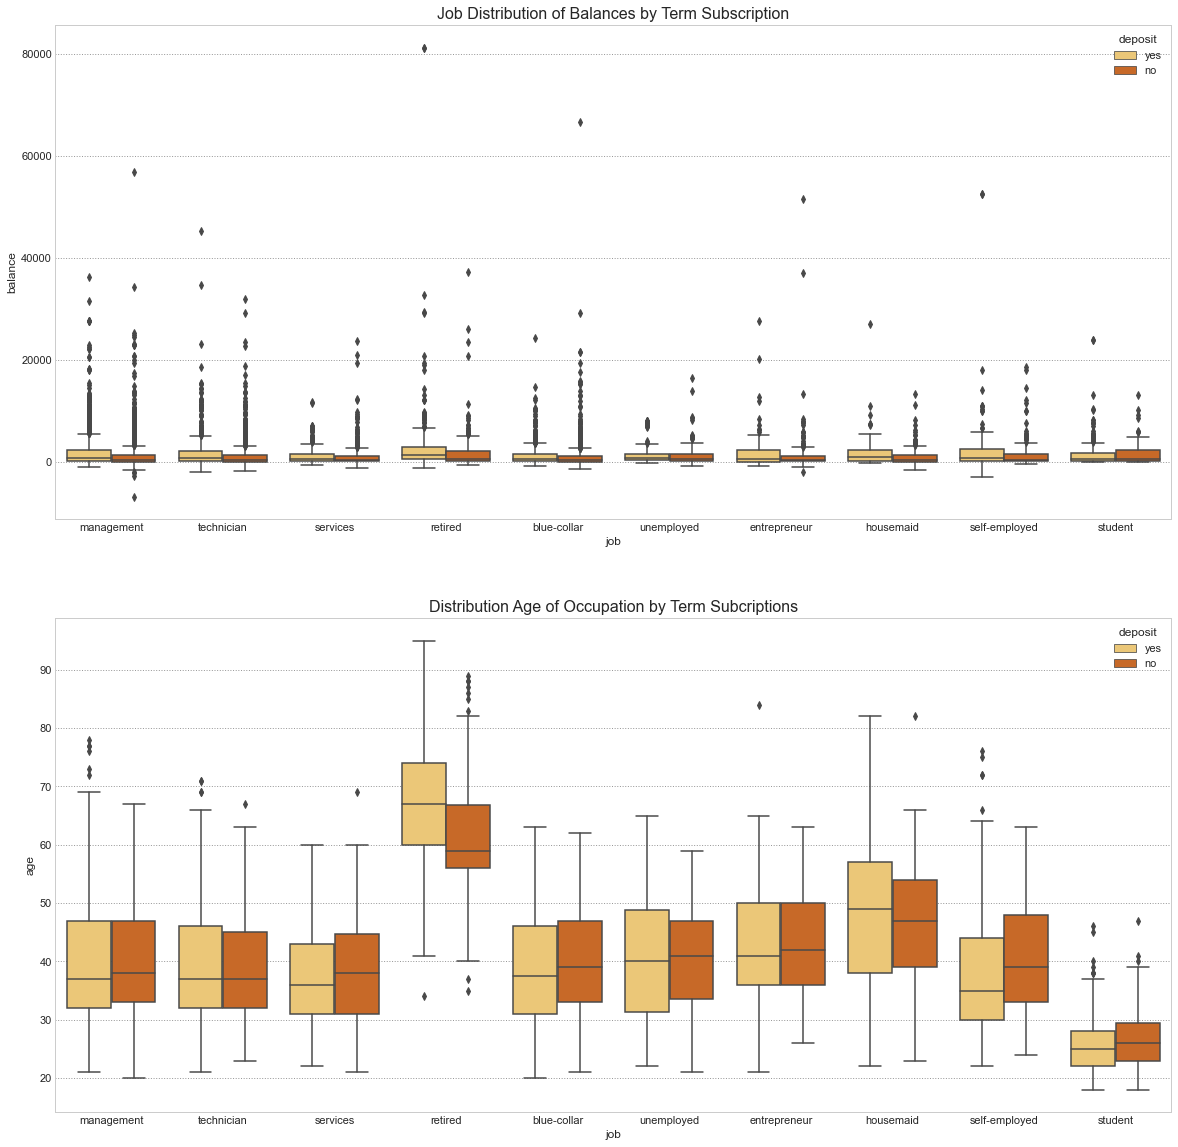

In [47]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

g = sns.boxplot(x="job", y="balance", hue="deposit", data=df, palette="YlOrBr", ax=ax1)
g.set_title("Job Distribution of Balances by Term Subscription", fontsize=16)

g1 = sns.boxplot(x='job', y='age', hue='deposit', data=df, palette='YlOrBr')
# g.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Distribution Age of Occupation by Term Subcriptions", fontsize=16)

# plt.savefig('Analysis by Ocupasion.png', dpi=400)
plt.show()

#### Insight 3:
- From `Type of Work by Term Subscription` and `Distribution Age of Occupation by Term Subscriptions`, we can see that customers who subscribed for term deposits tend to have greater balance and age values.


#### Side question

From the results of the data based on 'education X deposit', it was found that on average those who subscribe to term deposits are cutomers who are still '`tudents` and `retired`.

**Question** : Why do the student and retired categories have a greater possibility of using term deposits?

**Answer :** If we look at the **Type of Work by Term Subscriptions** subplot, we can find the answers:
- **Balance Aspect** : Students and the retired tend not to have an uncertain income to increase the balance. 

## Analysis by Balance

Find out account balance, which marketing campaign should focus on:

In [48]:
df_new=df.copy()
df_new['balance'].describe()

count    11092.000000
mean      1525.907411
std       3224.485911
min      -6847.000000
25%        122.000000
50%        549.000000
75%       1704.000000
max      81204.000000
Name: balance, dtype: float64

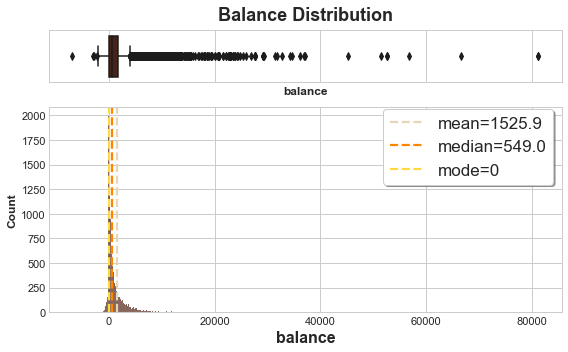

In [49]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)


def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0],color='#4F200D')
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1], color='#4F200D')
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='#E6D5B8', linestyle='--',linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='#FF8400', linestyle='--',linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='#FFD93D', linestyle='--',linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()
    
num_plot(df_new, 'balance', 'Balance Distribution', '')

In [50]:
df_new.loc[df_new["balance"] < 0 ,  'balance_group'] = 0
df_new.loc[(df_new["balance"] >= 0) & (df_new["balance"] <= 30000), 'balance_group'] = 1
df_new.loc[(df_new["balance"] > 30000) & (df_new["balance"] <= 40000), 'balance_group'] = 2
df_new.loc[df_new["balance"] > 40000, 'balance_group'] = 3

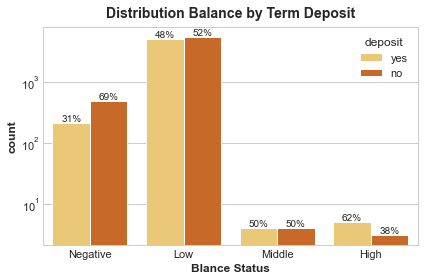

In [51]:
ax= sns.countplot(x='balance_group', hue='deposit', data=df_new, palette='YlOrBr')
ax.set_title('Subscription vs Non-Subscription by Balance Status', fontsize = 14)
ax.set_xticklabels(['Negative', 'Low', 'Middle', 'High'])
ax.set_yscale('log')
ax.set_xlabel('Blance Status')
plt.title('Distribution Balance by Term Deposit')

barPerc(df_new, 'balance_group', ax)

Consumers with balances **over 40,000 (high balance)** have a `62% chance` of signing up for term deposits. Also, customers who have a **middle balance status (> 30,000)** have a `50% possibility` of subscribing to term deposits.



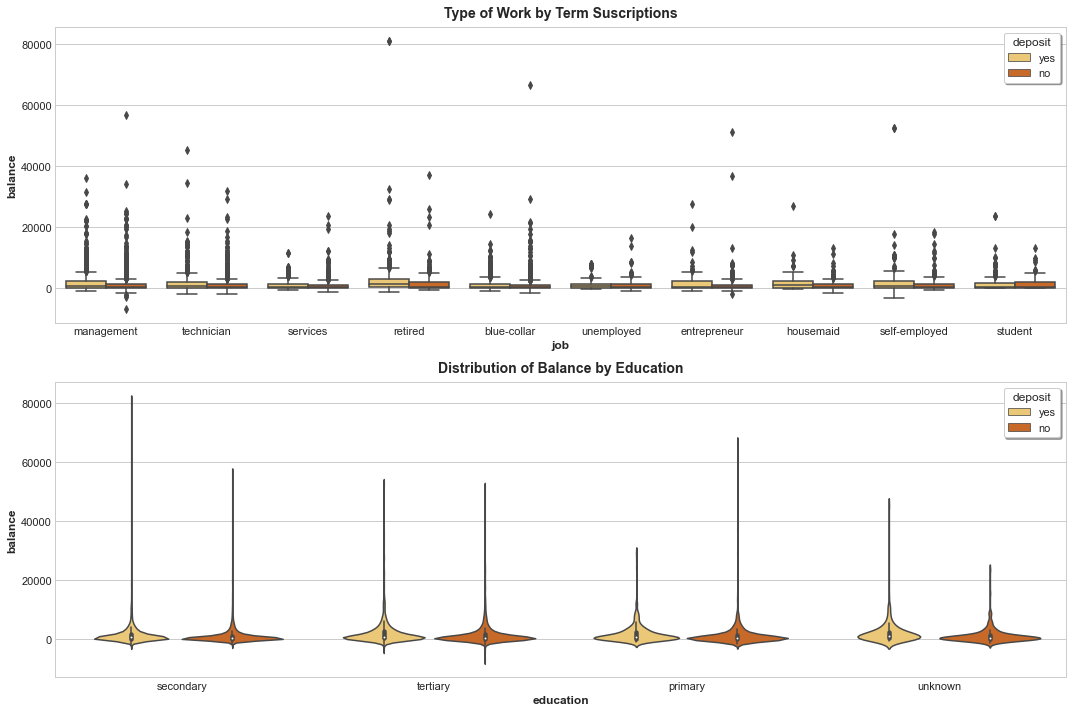

In [52]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax3 = fig.add_subplot(212)

g1 = sns.boxplot(x="job", y="balance", hue="deposit", data=df_new, palette="YlOrBr", ax=ax1)

g1.set_xticklabels(df_new["job"].unique(), rotation=0, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")
g1.legend(loc='upper right', title='deposit', fancybox=True, shadow=True, frameon=True)


g2 = sns.violinplot(data=df_new, x="education", y="balance", hue="deposit", palette="YlOrBr")

g2.set_title("Distribution of Balance by Education")
plt.legend(loc='upper right', title='deposit', fancybox=True, shadow=True, frameon=True)



plt.show()

<!--  The retired are the ones who have the highest median age while student are the lowest.
 
 Based on `analysis response by job`, we know that the customers who have a possibllity to tend to subscribe term deposit is `student` and `retired` occupation. If we see the boxplot `Age by Ocupation` students and the retired have the highest and the lowest median age.
 dan apabila kita lihat dari sudut pandang balance  -->

### Summary

The next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

## Analysis by Age:

In [53]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1.0
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1.0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1.0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1.0
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,1.0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,1.0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,1.0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,1.0


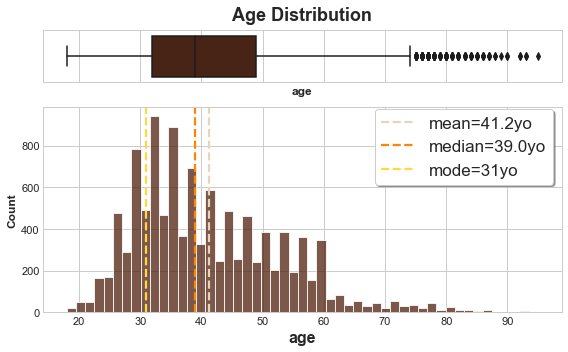

In [54]:
num_plot(df_new, 'age', 'Age Distribution', 'yo')

In [55]:
# Setup temp of dataframe

df_new.loc[df_new["age"] < 30,  'age_group'] = 20
df_new.loc[(df_new["age"] >= 30) & (df_new["age"] <= 39), 'age_group'] = 30
df_new.loc[(df_new["age"] >= 40) & (df_new["age"] <= 49), 'age_group'] = 40
df_new.loc[(df_new["age"] >= 50) & (df_new["age"] <= 59), 'age_group'] = 50
df_new.loc[df_new["age"] >= 60, 'age_group'] = 60

In [56]:
age_rate_sub = df_new[df_new['deposit'] == 'yes'][['age_group', 'deposit']].groupby('age_group').count()
age_rate_nonsub = df_new[df_new['deposit'] == 'no'][['age_group', 'deposit']].groupby('age_group').count()

age_rate_sub.deposit = age_rate_sub.deposit/age_rate_sub.deposit.sum() * 100
age_rate_nonsub.deposit = age_rate_nonsub.deposit/age_rate_nonsub.deposit.sum() * 100
    
print(age_rate_sub)
print(age_rate_nonsub)

             deposit
age_group           
20.0       17.583254
30.0       36.289248
40.0       20.076118
50.0       14.709800
60.0       11.341579
             deposit
age_group           
20.0       10.639027
30.0       41.099880
40.0       26.537605
50.0       18.673976
60.0        3.049512


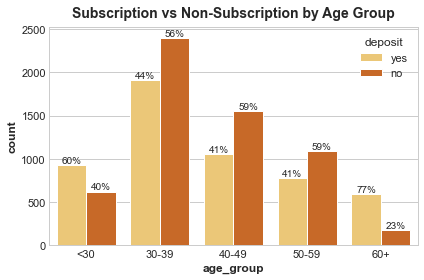

In [57]:
ax= sns.countplot(x='age_group', hue='deposit', data=df_new, palette='YlOrBr')
ax.set_title('Subscription vs Non-Subscription by Age Group', fontsize = 14)
ax.set_xticklabels(['<30', '30-39', '40-49', '50-59', '60+'])

barPerc(df_new, 'age_group', ax)

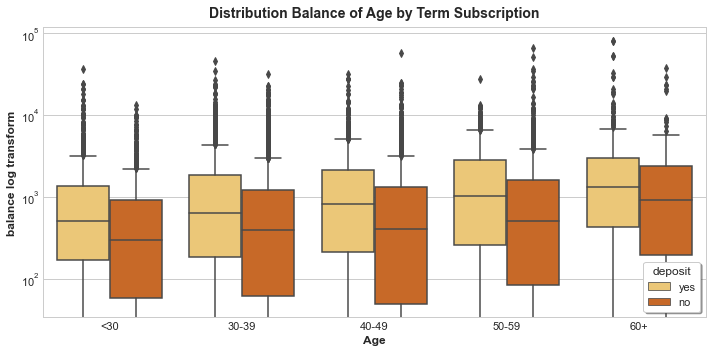

In [58]:
# palette = {'yes':'green', 'no':'red'}
# palette = {'yes':'#46C646', 'no':'#FF0000'}

plt.figure(figsize=(10,5))
ax=sns.boxplot(x='age_group', y='balance', hue='deposit', data=df_new, palette='YlOrBr')
plt.ylabel('balance log transform')
plt.xlabel('Age')
plt.title('Distribution Balance of Age by Term Subscription')
ax.set_xticklabels(['<30', '30-39', '40-49', '50-59', '60+'])
plt.yscale('log')
plt.legend(loc='lower right', title='deposit', fancybox=True, shadow=True, frameon=True)
plt.show()

### Summary

The bank should target prospective customers in their **20s or younger and 60s or older** in its upcoming marketing campaign. A term deposit was 60% likely to be subscribed to by the youngest category and 7% likely to be subscribed to by the oldest. To improve the chance of more people subscribing to term deposits, it would be wonderful if the bank focused on these two categories for the upcoming campaign.

## Analysis by Campaign Duration:

In [59]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Let's check :
- scale both numeric and categorical vaues
- Then let's use a correlation matrix
- With that we can determine if duration has influence on term deposits

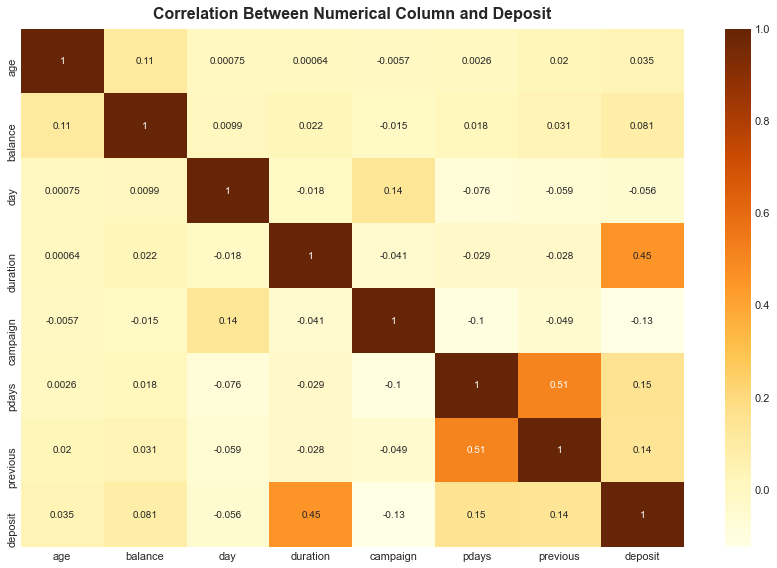

<Figure size 432x288 with 0 Axes>

In [60]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True,  annot = True, cmap="YlOrBr")
plt.title("Correlation Between Numerical Column and Deposit", fontsize=16)
plt.show()

results_path = 'Correlation Between Numerical Column and Deposit.png'
plt.savefig(results_path, dpi=400)

The heatmap above shows that `duration` and term `deposits` have a **high correlation**, meaning the higher the duration calling the client, the more likely it is for a client to open a term deposit.

Let's we check the avarage of duration!!

In [61]:
avg_duration=df['duration'].mean()
avg_duration

372.25649116480344

The average campaign duration is 371.99, let's see if clients that were above this average were more likely to open a term deposit.

In [62]:
lst=[df_new]
df['duration_status']= np.nan

for col in lst:
    col.loc[col['duration']< avg_duration, 'duration_status']= 'bellow_avg'
    col.loc[col['duration']> avg_duration, 'duration_status']= 'above_avg'

In [63]:
df_new['duration_status'].unique()

array(['above_avg', 'bellow_avg'], dtype=object)

In [64]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_status
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,NaN
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,NaN
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,NaN
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,NaN
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,NaN


Let's do **crosstab analysis**
<!-- 
Analisis Crosstab adalah teknik analisis berbentuk tabel yang menampilkan tabulasi silang dari data yang diamati. Analisis crosstab masuk ke dalam analisis statistik deskriptif dimana masing-masing variabel punya kekuatan ketika variabel tersebut dihubungkan satu sama lain.  -->

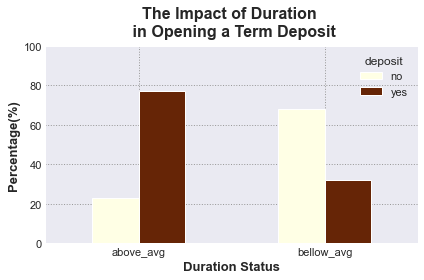

In [65]:
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})

pct_term = pd.crosstab(df_new['duration_status'], df_new['deposit']).apply(lambda r:round(r/r.sum(), 2)* 100, axis=1)

ax= pct_term.plot(kind= 'bar', stacked= False, cmap= "YlOrBr")
plt.title('The Impact of Duration \n in Opening a Term Deposit', fontsize=16)
# ax.set_xticklabels(df['duration_status'], rotation=0, rotation_mode='anchor')
plt.ylabel('Percentage(%)',  fontsize=13)
plt.xlabel("Duration Status", fontsize=13)
plt.xticks(rotation=0)
ax.set_ylim(0,100)

barPerc(df, 'duration_status', ax)
# plt.savefig('The Impact of Duration in Opening a Term Deposit.png', dpi=400)

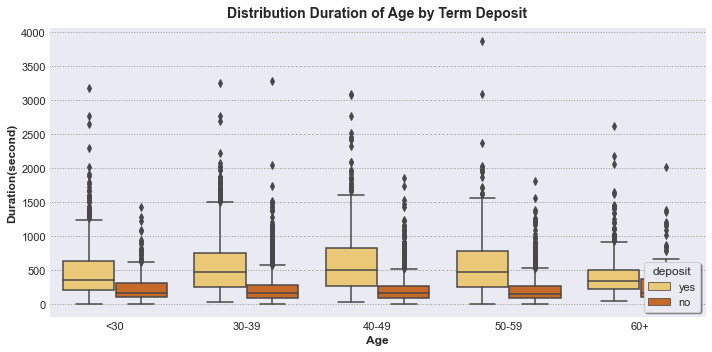

In [66]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x='age_group', y='duration', hue='deposit', data=df_new, palette='YlOrBr')
plt.ylabel('Duration(second)')
plt.xlabel('Age')
plt.title('Distribution Duration of Age by Term Deposit')
ax.set_xticklabels(['<30', '30-39', '40-49', '50-59', '60+'])
plt.legend(loc='lower right', title='deposit', fancybox=True, shadow=True, frameon=True)
plt.show()

### Summary
Duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
Customer with duration statuses **`above_avg` that were more likely to open term deposits**. Whereas just 32% of the group with durations `below average` opened term deposit accounts, 77% of the group with durations above average did so. This suggests that it will be good idea to **target individuals who are in the above average category**.

## Analysis by Month 

In [67]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

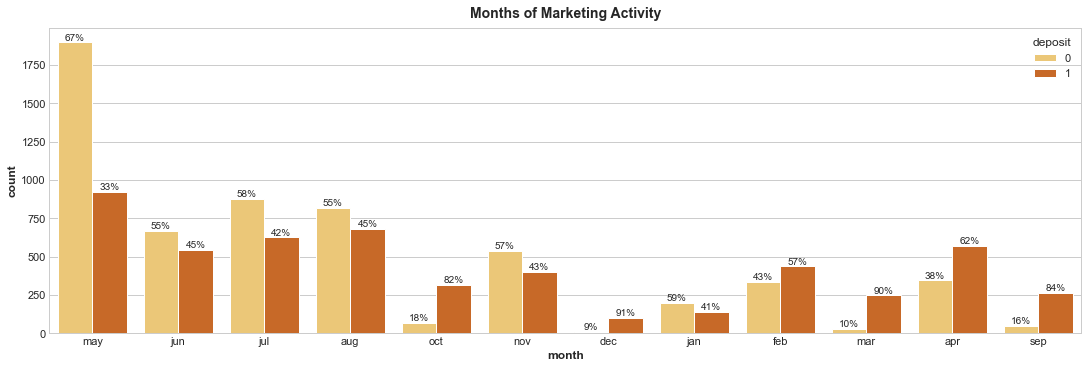

In [68]:
#Month and deposit
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(15,5), constrained_layout = True)
ax= sns.countplot(x='month', hue='deposit', data=df, orient='', palette='YlOrBr')
ax.set_title('Months of Marketing Activity', fontsize = 14)
barPerc(df, 'month', ax)

# plt.savefig('Month of Marketing Activity.png', dpi=400)

### Summary
For the diagram above, we can see that:
1. `May` is the highest activity marketing. However, this was the month that potential clients **tended to reject term deposit offers**
2. Month that have highest possibility that customers **tend to subscribe term deposits offer** is in `March`, `September`, `October`, and  `April` who have the highest effective rate above 63%. That's why it's recommended to carry out marketing activities at the end and beginning of the year.
3. `December` is also has a high effective rate, but it should be taken into consideration because it was the month with the lowest marketing activity. There might be a reason why December is the lowest.

# Modeling

## Data Preprocessing

We must have the dataset ready for processing before we can use machine learning techniques:
1. Convert columns with "yes" and "no" values to boolean columns.
2. Turn categorical columns into dummy variables 
3. Drop irrelevant columns.
4. Impute incorrect values

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_status
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,NaN
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,NaN
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,NaN
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,NaN
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,NaN


In [70]:
df= df.drop(['duration_status'], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [71]:
# Drop the Job Occupations that are "Unknown"
df_mod=df.copy()
df_mod = df_mod.drop(df_mod.loc[df_mod["job"] == "unknown"].index)
df_mod = df_mod.drop(df_mod.loc[df_mod["education"] == "unknown"].index)


# Manager and admin. are basically the same, added under the same categorical value.
lst = [df_mod]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"
# Seems to be management, but should be discussed with the relevant business unit.


In [75]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df_mod
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df


In [77]:
#clean the dataset
cleaned_df = clean_data(df_mod)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0


Create X and Y datasets for training the model and split into train and test datasets.